In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# === Load upsampled text data ===
X = np.load("C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/bert_embeddings_04sec.npy")
y = np.load("C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/labels_04sec.npy")

# === Reshape for LSTM: (samples, time_steps=1, features) ===
X = np.expand_dims(X, axis=1)

# === Build model function ===
def build_lstm_model(input_shape):
    return Sequential([
        LSTM(32, return_sequences=False, input_shape=input_shape),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

# === Stratified K-Fold ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"\n--- Fold {fold + 1} ---")
    
    # Show label distribution
    unique, counts = np.unique(y[test_idx], return_counts=True)
    print("Test set label distribution:", dict(zip(unique, counts)))
    
    # Build and train model
    model = build_lstm_model(X.shape[1:])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy')
    model.fit(X[train_idx], y[train_idx], epochs=10, batch_size=32, verbose=1)

    # Predict
    y_pred = (model.predict(X[test_idx]) > 0.5).astype(int)

    # Record results
    results.append({
        "Model": "LSTM",
        "Modality": "Text",
        "Upsampled": "Yes",
        "Fold": fold + 1,
        "Accuracy": accuracy_score(y[test_idx], y_pred),
        "Precision": precision_score(y[test_idx], y_pred, zero_division=0),
        "Recall": recall_score(y[test_idx], y_pred, zero_division=0),
        "F1 Score": f1_score(y[test_idx], y_pred, zero_division=0),
        "AUC": roc_auc_score(y[test_idx], y_pred)
    })

# === Save results ===
df = pd.DataFrame(results)
df.to_csv("Results_04sec_ablation_lstm/text_lstm_5fold_upsampled_stratified.csv", index=False)
print("\nFinal Fold-wise Results:")
print(df)



--- Fold 1 ---
Test set label distribution: {0: 3679, 1: 1053}
Epoch 1/10


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2239
Epoch 2/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1800
Epoch 3/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1720
Epoch 4/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1704
Epoch 5/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1675
Epoch 6/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1586
Epoch 7/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1433
Epoch 8/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1452
Epoch 9/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1352
Epoch 10/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1228
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

--- Fold 2 ---
Test set label distribution: {0: 3679, 1: 1053}
Epoch 1/10


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2240
Epoch 2/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1767
Epoch 3/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1695
Epoch 4/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1711
Epoch 5/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1606
Epoch 6/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1535
Epoch 7/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1525
Epoch 8/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1380
Epoch 9/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1262
Epoch 10/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1312
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

--- Fold 3 ---
Test set label distribution: {0: 3679, 1: 1053}
Epoch 1/10


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2399
Epoch 2/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1805
Epoch 3/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1784
Epoch 4/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1735
Epoch 5/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1716
Epoch 6/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1590
Epoch 7/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1446
Epoch 8/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1458
Epoch 9/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1322
Epoch 10/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1194
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

--- Fold 4 ---
Test set label distribution: {0: 3679, 1: 1052}
Epoch 1/10


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2276
Epoch 2/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1872
Epoch 3/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1717
Epoch 4/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1722
Epoch 5/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1681
Epoch 6/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1557
Epoch 7/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1513
Epoch 8/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1448
Epoch 9/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1323
Epoch 10/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1257
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

--- Fold 5 ---
Test set label distribution: {0: 3679, 1: 1052}
Epoch 1/10


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2288
Epoch 2/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1739
Epoch 3/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1800
Epoch 4/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1668
Epoch 5/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1608
Epoch 6/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1590
Epoch 7/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1448
Epoch 8/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1505
Epoch 9/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1386
Epoch 10/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1285
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Final Fold-wise Results:
  Model Modality Upsampled  Fold  Accuracy  Precision    Recall  F1 Score  \
0  LSTM     Text       Yes     1  0.939138   0.925473  0.790123  0.852459   
1  LSTM     Text       Yes     2  0.939349   0.927455  0.789174  0.852745   
2  LSTM     Text       Yes     3  0.942519

In [7]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# === Load upsampled audio features and labels ===
X = np.load("C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/acoustic_scaled_56_04sec.npy")
y = np.load("C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/labels_04sec.npy")

# === Define DNN model builder ===
def build_dnn_model(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy')
    return model

# === Stratified K-Fold Evaluation ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"\n--- Fold {fold + 1} ---")

    # Optional: print label distribution
    unique, counts = np.unique(y[test_idx], return_counts=True)
    print("Test set label distribution:", dict(zip(unique, counts)))

    model = build_dnn_model(X.shape[1])
    model.fit(X[train_idx], y[train_idx], epochs=30, batch_size=32, verbose=1)

    y_pred = (model.predict(X[test_idx]) > 0.5).astype(int)

    results.append({
        "Model": "DNN",
        "Modality": "Audio",
        "Upsampled": "Yes",
        "Fold": fold + 1,
        "Accuracy": accuracy_score(y[test_idx], y_pred),
        "Precision": precision_score(y[test_idx], y_pred, zero_division=0),
        "Recall": recall_score(y[test_idx], y_pred, zero_division=0),
        "F1 Score": f1_score(y[test_idx], y_pred, zero_division=0),
        "AUC": roc_auc_score(y[test_idx], y_pred)
    })

# === Save results ===
df = pd.DataFrame(results)
os.makedirs("Results_04sec_ablation_dense", exist_ok=True)
df.to_csv("Results_04sec_ablation_dense/dnn_audio_5fold_upsampled.csv", index=False)
print("\nFinal Results:")
print(df)



--- Fold 1 ---
Test set label distribution: {0: 3679, 1: 1053}
Epoch 1/30


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5065
Epoch 2/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4350
Epoch 3/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3909
Epoch 4/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3662
Epoch 5/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3458
Epoch 6/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3241
Epoch 7/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3139
Epoch 8/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2990
Epoch 9/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2900
Epoch 10/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2856
Epoch 11/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2832
Epoch 12/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2666
Epoch 13/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2534
Epoch 14/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2610
Epoch 15/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2401


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5298
Epoch 2/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4312
Epoch 3/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3923
Epoch 4/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3732
Epoch 5/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3416
Epoch 6/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3282
Epoch 7/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3096
Epoch 8/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2969
Epoch 9/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2885
Epoch 10/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2788
Epoch 11/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2704
Epoch 12/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2607
Epoch 13/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2539
Epoch 14/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2497
Epoch 15/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2348


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5085
Epoch 2/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4358
Epoch 3/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3953
Epoch 4/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3723
Epoch 5/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3478
Epoch 6/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3362
Epoch 7/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3154
Epoch 8/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3028
Epoch 9/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2920
Epoch 10/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2807
Epoch 11/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2794
Epoch 12/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2673
Epoch 13/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2547
Epoch 14/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2496
Epoch 15/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2447


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5285
Epoch 2/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4335
Epoch 3/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3996
Epoch 4/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3705
Epoch 5/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3477
Epoch 6/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3226
Epoch 7/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3121
Epoch 8/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3017
Epoch 9/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2943
Epoch 10/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2809
Epoch 11/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2730
Epoch 12/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2652
Epoch 13/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2543
Epoch 14/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2571
Epoch 15/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2427


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5130
Epoch 2/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4401
Epoch 3/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3957
Epoch 4/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3734
Epoch 5/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3438
Epoch 6/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3347
Epoch 7/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3151
Epoch 8/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3092
Epoch 9/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2942
Epoch 10/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2755
Epoch 11/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2797
Epoch 12/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2626
Epoch 13/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2542
Epoch 14/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2572
Epoch 15/30
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2515


Label distribution: {0: 18395, 1: 5263}


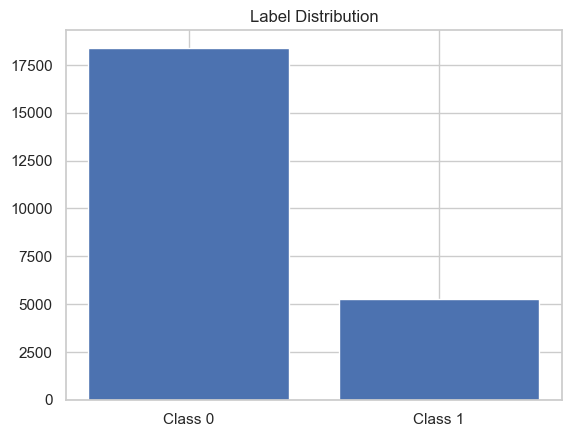

Epoch 1/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7558 - loss: 0.5363 - val_accuracy: 0.7980 - val_loss: 0.4389
Epoch 2/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7994 - loss: 0.4365 - val_accuracy: 0.8354 - val_loss: 0.3819
Epoch 3/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8163 - loss: 0.3986 - val_accuracy: 0.8455 - val_loss: 0.3571
Epoch 4/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8334 - loss: 0.3697 - val_accuracy: 0.8601 - val_loss: 0.3387
Epoch 5/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8423 - loss: 0.3553 - val_accuracy: 0.8648 - val_loss: 0.3191
Epoch 6/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8475 - loss: 0.3358 - val_accuracy: 0.8700 - val_loss: 0.3091
Epoch 7/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8562 - loss: 0.3221 - val_accuracy: 0.8781 - val_loss: 0.2941
Epoch 8/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8651 - loss: 0.3093 - val_accuracy: 0.


Validation Classification Report:
              precision    recall  f1-score   support

           0     0.9340    0.9543    0.9441      3679
           1     0.8273    0.7645    0.7947      1053

    accuracy                         0.9121      4732
   macro avg     0.8807    0.8594    0.8694      4732
weighted avg     0.9103    0.9121    0.9108      4732



In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# === Load data ===
X_audio = np.load("C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/acoustic_scaled_56_04sec.npy")
y_audio = np.load("C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/labels_04sec.npy")

# === Sanity check: class balance ===
unique, counts = np.unique(y_audio, return_counts=True)
print("Label distribution:", dict(zip(unique, counts)))

# Optional: plot balance
plt.bar(["Class 0", "Class 1"], counts)
plt.title("Label Distribution")
plt.show()

# === Train-test split ===
X_train, X_val, y_train, y_val = train_test_split(
    X_audio, y_audio, test_size=0.2, stratify=y_audio, random_state=42
)

# === Build model ===
model = Sequential([
    Input(shape=(X_audio.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# === Train with early stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# === Evaluate ===
y_pred = (model.predict(X_val) > 0.5).astype(int)
print("\nValidation Classification Report:")
print(classification_report(y_val, y_pred, digits=4))

# === Save fixed model ===
model.save("saved_models/dnn_audio_model.h5")


In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Load upsampled text data ===
X = np.load("C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/bert_embeddings_04sec.npy")
y = np.load("C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/labels_04sec.npy")

# === Reshape for LSTM: (samples, time_steps=1, features) ===
X = np.expand_dims(X, axis=1)

# === Stratified train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# === Build model function ===
def build_lstm_model(input_shape):
    return Sequential([
        LSTM(32, return_sequences=False, input_shape=input_shape),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

# === Train model ===
model = build_lstm_model(X.shape[1:])
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# === Optional: early stopping ===
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks=[early_stop], verbose=1)

# === Predict and evaluate ===
y_pred = (model.predict(X_test) > 0.5).astype(int)

results = {
    "Model": "LSTM",
    "Modality": "Text",
    "Upsampled": "Yes",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, zero_division=0),
    "Recall": recall_score(y_test, y_pred, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred, zero_division=0),
    "AUC": roc_auc_score(y_test, y_pred)
}

# === Save model ===
model.save("saved_models/text_lstm_upsampled.h5")

# === Print results ===
print("\nSingle-Split LSTM Text Model Evaluation:")
print(classification_report(y_test, y_pred, digits=4))
print("\nMetrics Summary:")
print(results)

# === Save to CSV ===
pd.DataFrame([results]).to_csv("Results_04sec_ablation_lstm/text_lstm_single_split.csv", index=False)


Epoch 1/10


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


533/533 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9330 - loss: 0.2224 - val_accuracy: 0.8753 - val_loss: 0.3464
Epoch 2/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9482 - loss: 0.1692 - val_accuracy: 0.8928 - val_loss: 0.3213
Epoch 3/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9464 - loss: 0.1757 - val_accuracy: 0.8917 - val_loss: 0.3188
Epoch 4/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9552 - loss: 0.1557 - val_accuracy: 0.9007 - val_loss: 0.3094
Epoch 5/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9520 - loss: 0.1542 - val_accuracy: 0.8933 - val_loss: 0.3145
Epoch 6/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9567 - loss: 0.1447 - val_accuracy: 0.8833 - val_loss: 0.3606
Epoch 7/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9557 - loss: 0.1471 - val_accuracy: 0.8928 - val_loss: 0.3399
Epoch 8/10
533/533 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9613 - loss: 0.1305 - val_accuracy: 0.8922 - val_


Single-Split LSTM Text Model Evaluation:
              precision    recall  f1-score   support

           0     0.9465    0.9953    0.9703      3647
           1     0.9810    0.8111    0.8880      1085

    accuracy                         0.9531      4732
   macro avg     0.9638    0.9032    0.9292      4732
weighted avg     0.9545    0.9531    0.9514      4732


Metrics Summary:
{'Model': 'LSTM', 'Modality': 'Text', 'Upsampled': 'Yes', 'Accuracy': 0.9530853761622993, 'Precision': 0.9810479375696767, 'Recall': 0.8110599078341014, 'F1 Score': 0.887991927346115, 'AUC': 0.9031992711641031}



--- Fold 1 ---
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 1000x800 with 0 Axes>

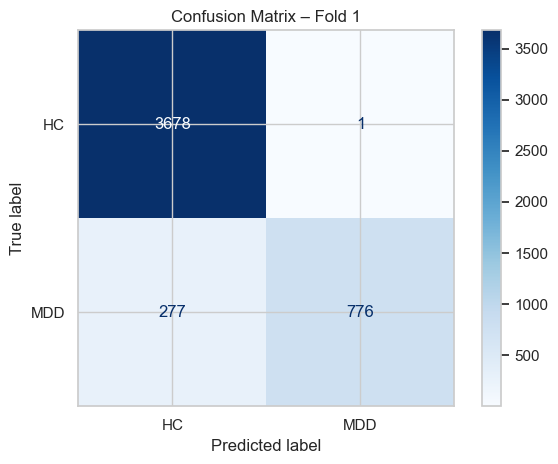


--- Fold 2 ---
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step


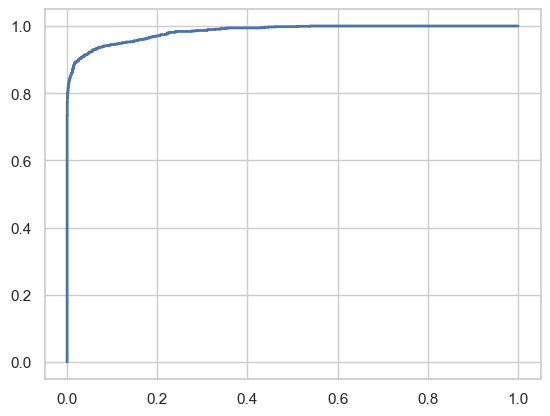

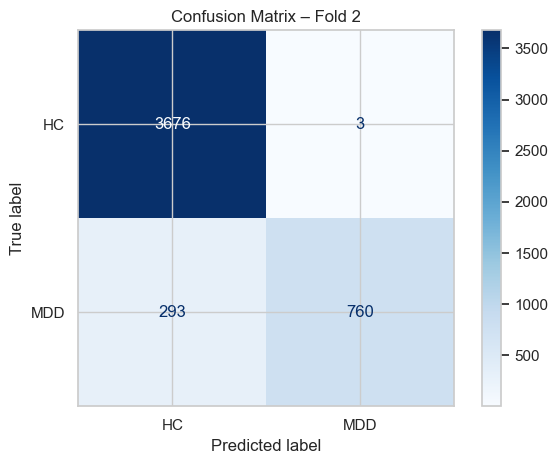


--- Fold 3 ---
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step


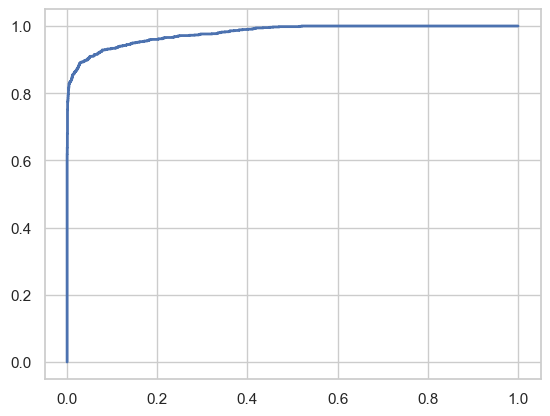

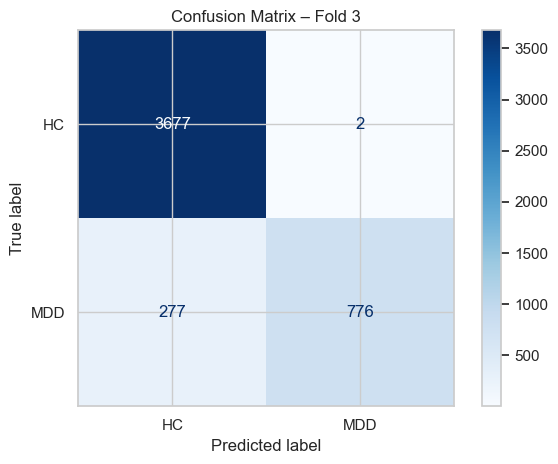


--- Fold 4 ---
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step


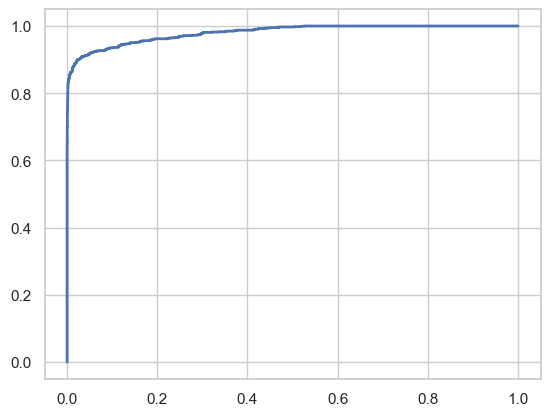

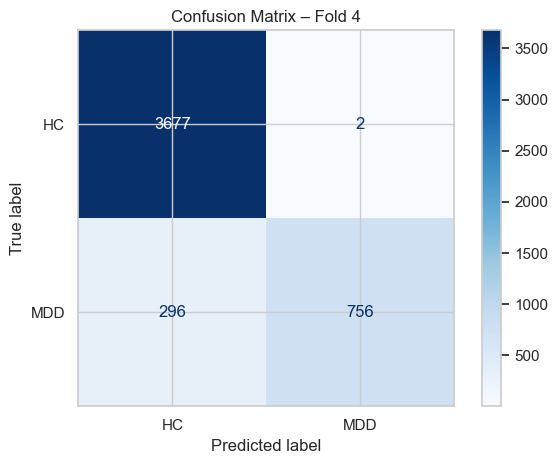


--- Fold 5 ---
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step


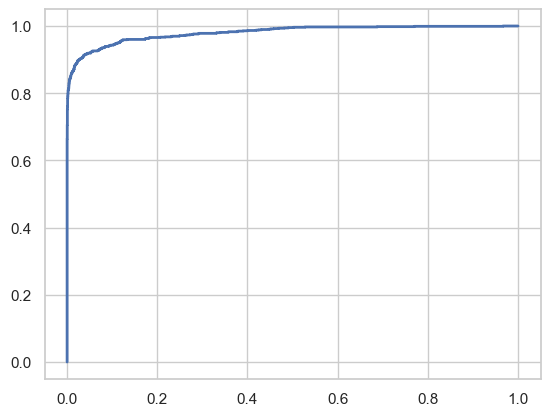

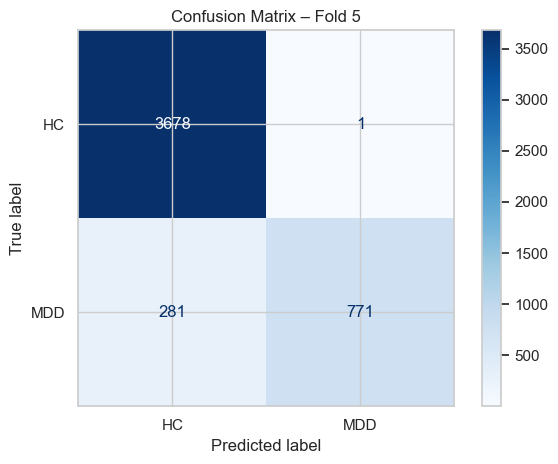

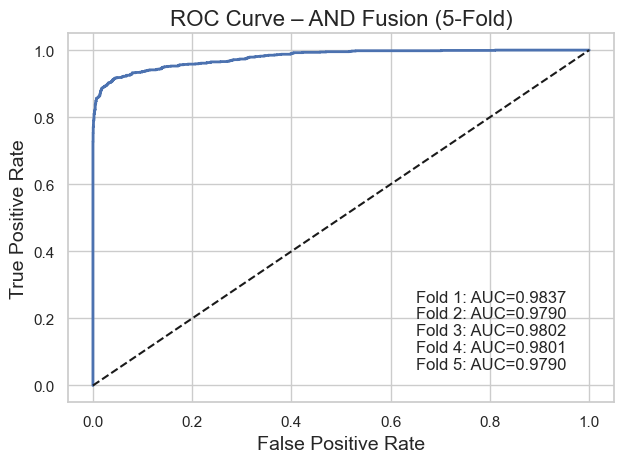


AND Fusion 5-Fold Results:
  Fusion  Fold  Accuracy  Precision  Recall  F1 Score     AUC
0    AND     1    0.9413     0.9987  0.7369    0.8481  0.9837
1    AND     2    0.9374     0.9961  0.7217    0.8370  0.9790
2    AND     3    0.9410     0.9974  0.7369    0.8476  0.9802
3    AND     4    0.9370     0.9974  0.7186    0.8354  0.9801
4    AND     5    0.9404     0.9987  0.7329    0.8454  0.9790

Average Performance (mean ± std):
Accuracy: 0.9394 ± 0.0020
Precision: 0.9977 ± 0.0011
Recall: 0.7294 ± 0.0087
F1 Score: 0.8427 ± 0.0061
AUC: 0.9804 ± 0.0019


In [39]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)
from tensorflow.keras.models import load_model

# === Set Plot Style ===
sns.set(style="whitegrid")

# === Load Data ===
X_text = np.load("C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/bert_embeddings_04sec.npy")
X_audio = np.load("C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/acoustic_scaled_56_04sec.npy")
y = np.load("C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/labels_04sec.npy")

X_text = np.expand_dims(X_text, axis=1)  # for LSTM input

# === Load Trained Models ===
text_model = load_model("saved_models/text_lstm_upsampled.h5")
audio_model = load_model("saved_models/dnn_audio_model.h5")

# === Stratified 5-Fold Setup ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fusion_results = []
legend_texts = []

# === Initialize ROC Plot ===
plt.figure(figsize=(10, 8))

for fold, (train_idx, test_idx) in enumerate(skf.split(X_text, y)):
    print(f"\n--- Fold {fold + 1} ---")
    y_test = y[test_idx]

    # Get prediction probabilities
    prob_text = text_model.predict(X_text[test_idx])
    prob_audio = audio_model.predict(X_audio[test_idx])
    prob_fused = np.minimum(prob_text, prob_audio)

    # Binarized predictions
    y_pred_text = (prob_text > 0.5).astype(int)
    y_pred_audio = (prob_audio > 0.5).astype(int)
    y_pred_fused = np.logical_and(y_pred_text, y_pred_audio).astype(int)

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred_fused)
    prec = precision_score(y_test, y_pred_fused, zero_division=0)
    rec = recall_score(y_test, y_pred_fused, zero_division=0)
    f1 = f1_score(y_test, y_pred_fused, zero_division=0)
    auc_score = roc_auc_score(y_test, prob_fused)

    fusion_results.append({
        "Fusion": "AND",
        "Fold": fold + 1,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "AUC": auc_score
    })

    # === Confusion Matrix ===
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred_fused, display_labels=["HC", "MDD"],
        cmap="Blues", values_format="d"
    )
    disp.ax_.set_title(f"Confusion Matrix – Fold {fold + 1}")
    plt.tight_layout()
    plt.show()

    # === ROC Curve ===
    fpr, tpr, _ = roc_curve(y_test, prob_fused)
    plt.plot(fpr, tpr, lw=2)
    legend_texts.append(f"Fold {fold+1}: AUC={auc_score:.4f}")

# === Finalize ROC Plot with AUCs in Lower-Right ===
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Write AUC values in lower right corner like a legend
for i, text in enumerate(legend_texts):
    plt.text(0.65, 0.25 - i * 0.05, text, fontsize=12)

plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve – AND Fusion (5-Fold)", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

# === Save Results ===
df_fusion = pd.DataFrame(fusion_results)
os.makedirs("Results_04sec_ablation_fusion", exist_ok=True)
df_fusion.to_csv("Results_04sec_ablation_fusion/and_fusion_lstm_dnn.csv", index=False)

# === Print Results Table ===
print("\nAND Fusion 5-Fold Results:")
print(df_fusion.round(4))

# === Print Mean ± Std ===
print("\nAverage Performance (mean ± std):")
for metric in ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]:
    mean = df_fusion[metric].mean()
    std = df_fusion[metric].std()
    print(f"{metric}: {mean:.4f} ± {std:.4f}")



--- Fold 1 ---
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 1000x800 with 0 Axes>

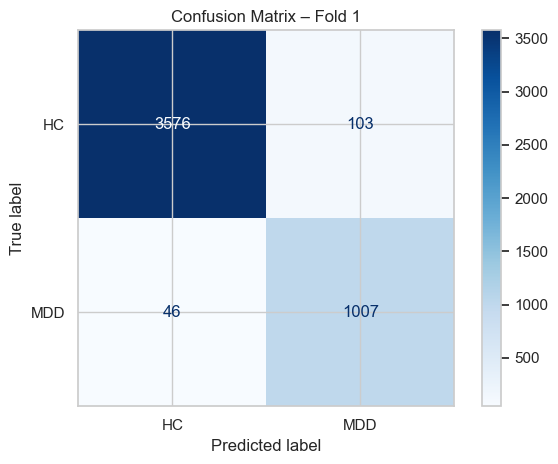


--- Fold 2 ---
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


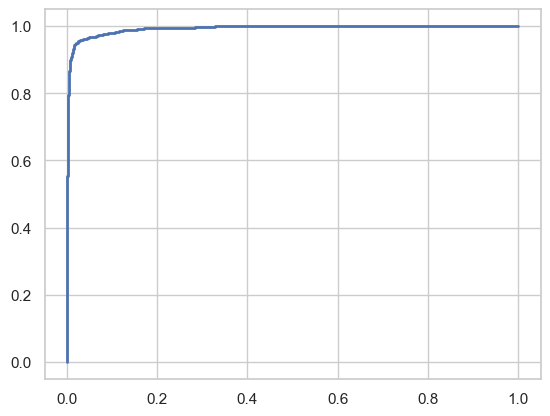

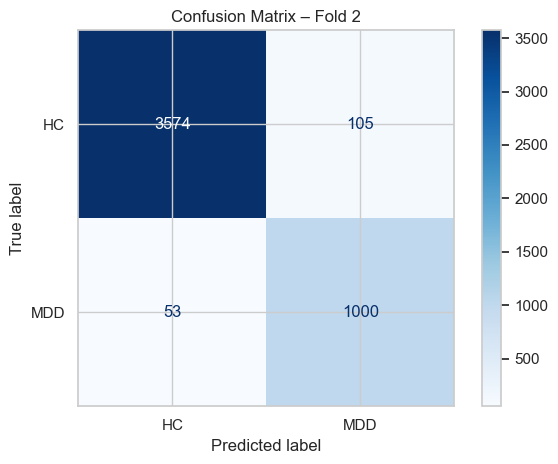


--- Fold 3 ---
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step


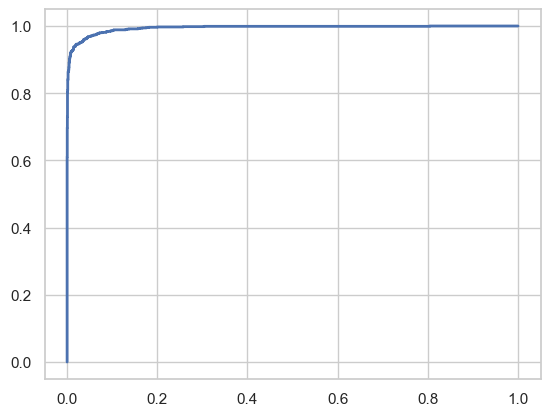

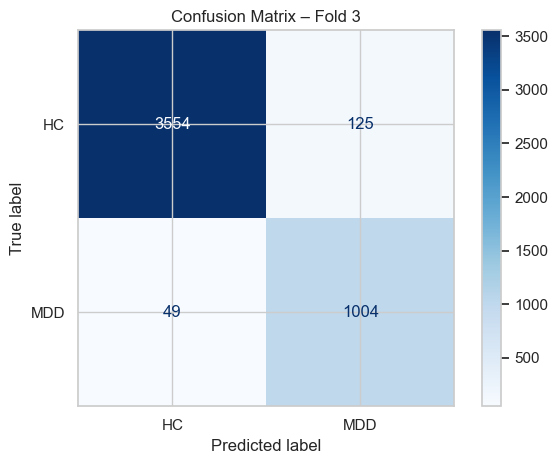


--- Fold 4 ---
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step


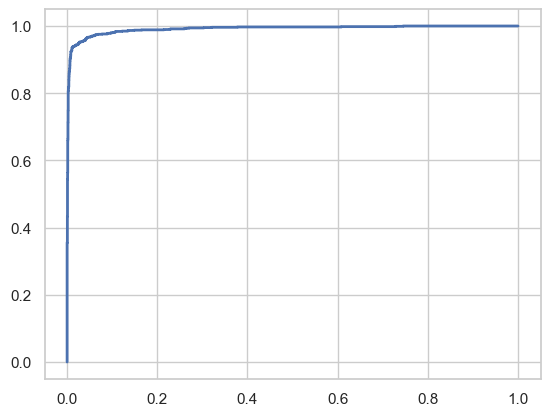

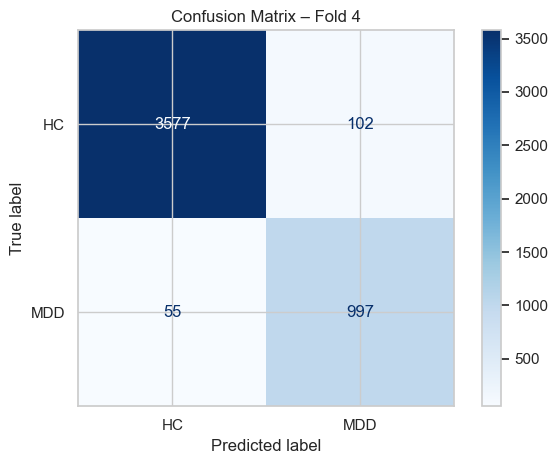


--- Fold 5 ---
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


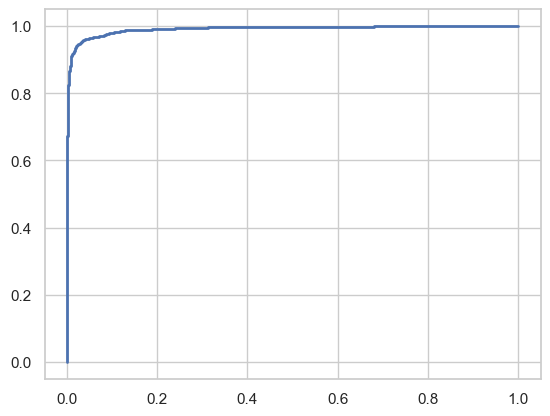

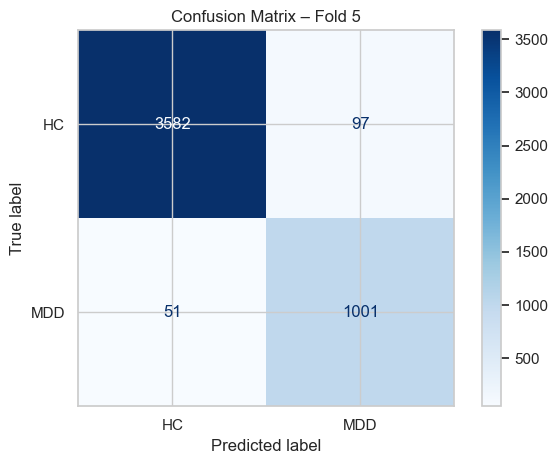

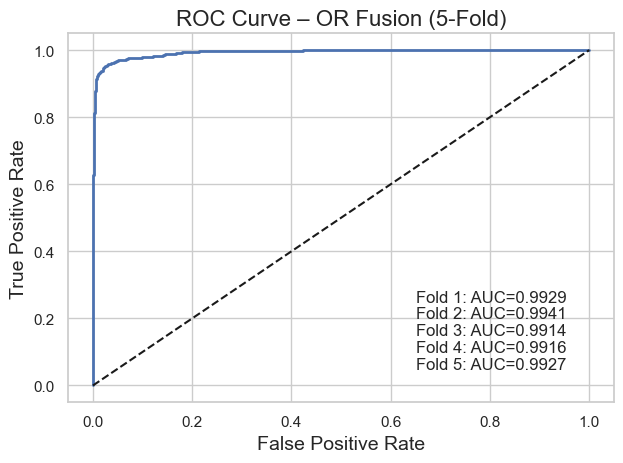


OR Fusion 5-Fold Results:
  Fusion  Fold  Accuracy  Precision  Recall  F1 Score     AUC
0     OR     1    0.9685     0.9072  0.9563    0.9311  0.9929
1     OR     2    0.9666     0.9050  0.9497    0.9268  0.9941
2     OR     3    0.9632     0.8893  0.9535    0.9203  0.9914
3     OR     4    0.9668     0.9072  0.9477    0.9270  0.9916
4     OR     5    0.9687     0.9117  0.9515    0.9312  0.9927

Average Performance (mean ± std):
Accuracy: 0.9668 ± 0.0022
Precision: 0.9041 ± 0.0086
Recall: 0.9517 ± 0.0033
F1 Score: 0.9273 ± 0.0045
AUC: 0.9925 ± 0.0011


In [43]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)
from tensorflow.keras.models import load_model

# === Set Plot Style ===
sns.set(style="whitegrid")

# === Load Data ===
X_text = np.load("C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/bert_embeddings_04sec.npy")
X_audio = np.load("C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/acoustic_scaled_56_04sec.npy")
y = np.load("C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/labels_04sec.npy")

X_text = np.expand_dims(X_text, axis=1)  # for LSTM input

# === Load Trained Models ===
text_model = load_model("saved_models/text_lstm_upsampled.h5")
audio_model = load_model("saved_models/dnn_audio_model.h5")

# === Stratified 5-Fold Setup ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fusion_results = []
legend_texts = []

# === Initialize ROC Plot ===
plt.figure(figsize=(10, 8))

for fold, (train_idx, test_idx) in enumerate(skf.split(X_text, y)):
    print(f"\n--- Fold {fold + 1} ---")
    y_test = y[test_idx]

    # Get prediction probabilities
    prob_text = text_model.predict(X_text[test_idx])
    prob_audio = audio_model.predict(X_audio[test_idx])
    prob_fused = np.maximum(prob_text, prob_audio)  # OR fusion uses max

    # Binarized predictions
    y_pred_text = (prob_text > 0.5).astype(int)
    y_pred_audio = (prob_audio > 0.5).astype(int)
    y_pred_fused = np.logical_or(y_pred_text, y_pred_audio).astype(int)

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred_fused)
    prec = precision_score(y_test, y_pred_fused, zero_division=0)
    rec = recall_score(y_test, y_pred_fused, zero_division=0)
    f1 = f1_score(y_test, y_pred_fused, zero_division=0)
    auc_score = roc_auc_score(y_test, prob_fused)

    fusion_results.append({
        "Fusion": "OR",
        "Fold": fold + 1,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "AUC": auc_score
    })

    # === Confusion Matrix ===
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred_fused, display_labels=["HC", "MDD"],
        cmap="Blues", values_format="d"
    )
    disp.ax_.set_title(f"Confusion Matrix – Fold {fold + 1}")
    plt.tight_layout()
    plt.show()

    # === ROC Curve ===
    fpr, tpr, _ = roc_curve(y_test, prob_fused)
    plt.plot(fpr, tpr, lw=2)
    legend_texts.append(f"Fold {fold+1}: AUC={auc_score:.4f}")

# === Finalize ROC Plot with AUCs in Lower-Right ===
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Write AUC values in lower right corner like a legend
for i, text in enumerate(legend_texts):
    plt.text(0.65, 0.25 - i * 0.05, text, fontsize=12)

plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve – OR Fusion (5-Fold)", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

# === Save Results ===
df_fusion = pd.DataFrame(fusion_results)
os.makedirs("Results_04sec_ablation_fusion", exist_ok=True)
df_fusion.to_csv("Results_04sec_ablation_fusion/or_fusion_lstm_dnn.csv", index=False)

# === Print Results Table ===
print("\nOR Fusion 5-Fold Results:")
print(df_fusion.round(4))

# === Print Mean ± Std ===
print("\nAverage Performance (mean ± std):")
for metric in ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]:
    mean = df_fusion[metric].mean()
    std = df_fusion[metric].std()
    print(f"{metric}: {mean:.4f} ± {std:.4f}")



--- Fold 1 ---
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 1000x800 with 0 Axes>

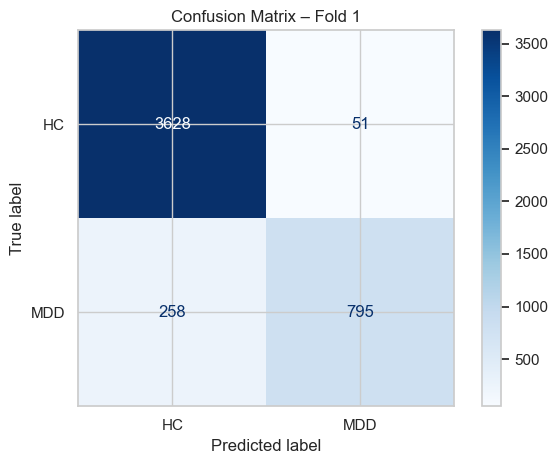


--- Fold 2 ---
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


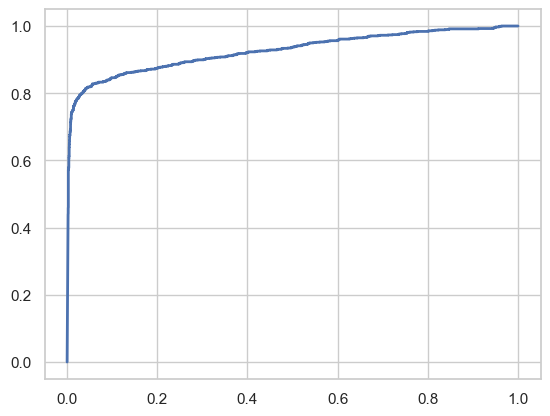

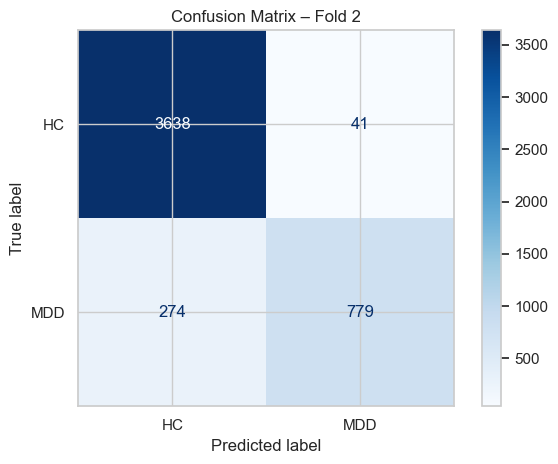


--- Fold 3 ---
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


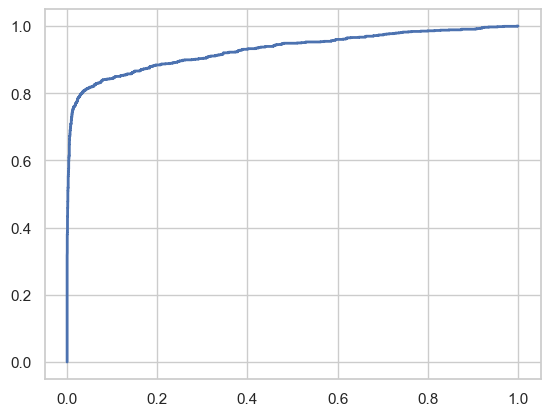

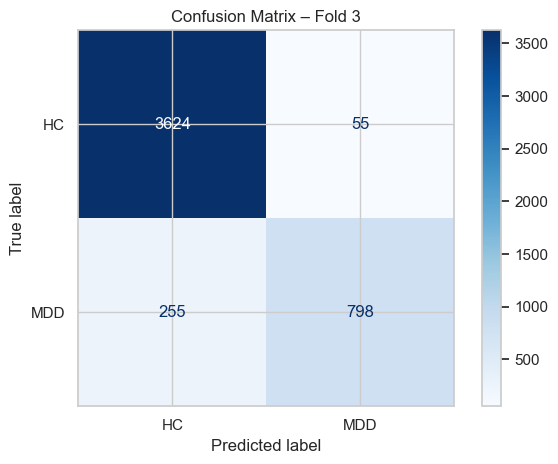


--- Fold 4 ---
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


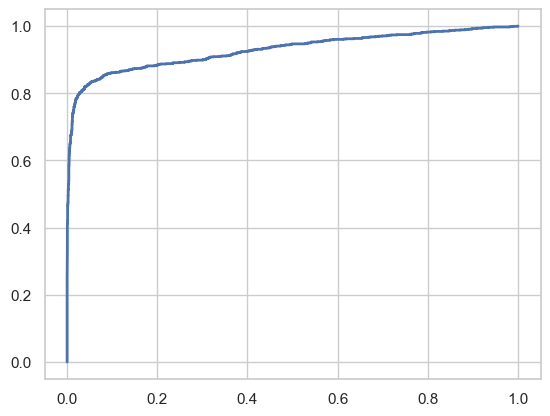

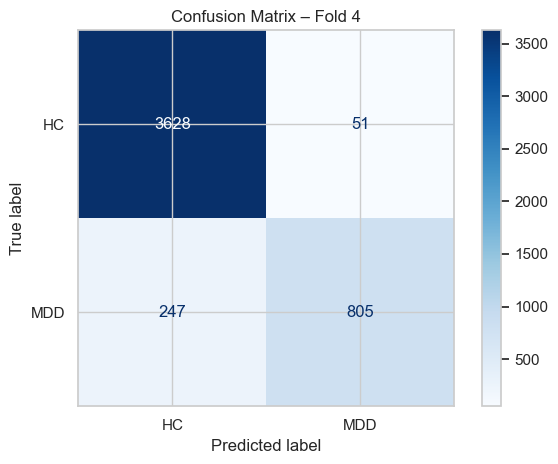


--- Fold 5 ---
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


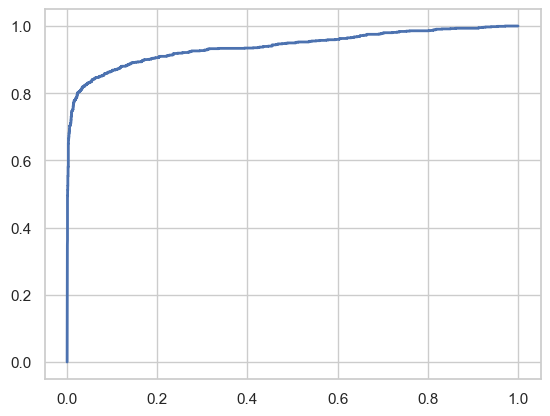

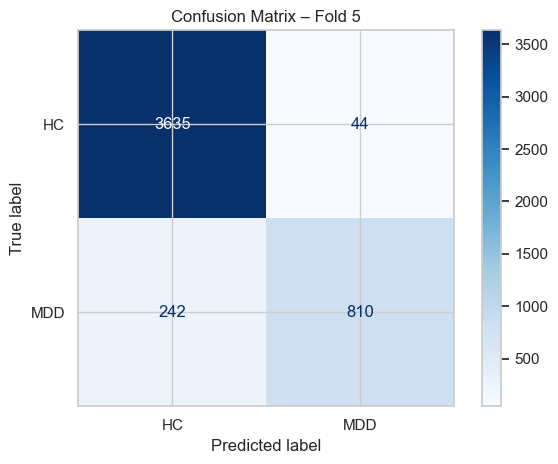

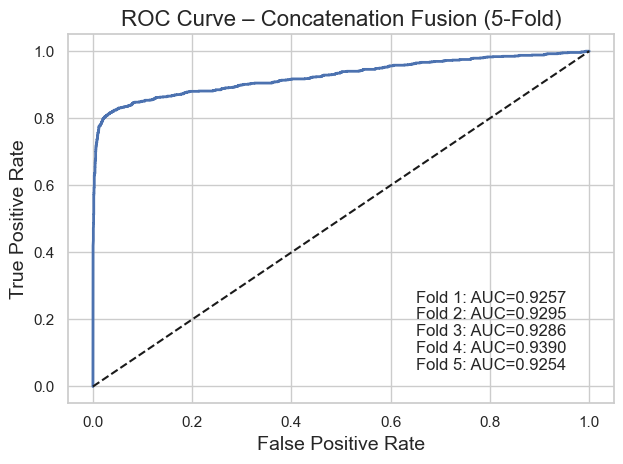


Concatenation Fusion 5-Fold Results:
          Fusion  Fold  Accuracy  Precision  Recall  F1 Score     AUC
0  Concatenation     1    0.9347     0.9397  0.7550    0.8373  0.9257
1  Concatenation     2    0.9334     0.9500  0.7398    0.8318  0.9295
2  Concatenation     3    0.9345     0.9355  0.7578    0.8374  0.9286
3  Concatenation     4    0.9370     0.9404  0.7652    0.8438  0.9390
4  Concatenation     5    0.9395     0.9485  0.7700    0.8499  0.9254

Average Performance (mean ± std):
Accuracy: 0.9358 ± 0.0025
Precision: 0.9428 ± 0.0062
Recall: 0.7576 ± 0.0116
F1 Score: 0.8400 ± 0.0070
AUC: 0.9296 ± 0.0055


In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# === Set Style ===
sns.set(style="whitegrid")

# === Load Data ===
X_text = np.load("C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/bert_embeddings_04sec.npy")
X_audio = np.load("C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/acoustic_scaled_56_04sec.npy")
y = np.load("C:/Users/Administrator/PycharmProjects/Comprehensive/04sec_edaic/Data_edaic/labels_04sec.npy")

# === Concatenate Features ===
X_text = X_text.squeeze(axis=1) if X_text.ndim == 3 else X_text
X_concat = np.concatenate([X_text, X_audio], axis=1)

# === Define Fusion Model ===
def build_concat_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# === Setup ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fusion_results = []
legend_texts = []
output_dir = "Results_04sec_ablation_fusion"

# === Initialize ROC Plot ===
plt.figure(figsize=(10, 8))

for fold, (train_idx, test_idx) in enumerate(skf.split(X_concat, y)):
    print(f"\n--- Fold {fold + 1} ---")
    X_train, X_test = X_concat[train_idx], X_concat[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = build_concat_model(X_concat.shape[1])
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0, validation_split=0.1)

    # Prediction
    prob_pred = model.predict(X_test)
    y_pred = (prob_pred > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc_score = roc_auc_score(y_test, prob_pred)

    fusion_results.append({
        "Fusion": "Concatenation",
        "Fold": fold + 1,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "AUC": auc_score
    })

    # === Confusion Matrix ===
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, display_labels=["HC", "MDD"],
        cmap="Blues", values_format="d"
    )
    disp.ax_.set_title(f"Confusion Matrix – Fold {fold + 1}")
    plt.tight_layout()
    plt.show()

    # === ROC Curve ===
    fpr, tpr, _ = roc_curve(y_test, prob_pred)
    plt.plot(fpr, tpr, lw=2)
    legend_texts.append(f"Fold {fold+1}: AUC={auc_score:.4f}")

# === Finalize ROC Plot ===
plt.plot([0, 1], [0, 1], 'k--', label='Random')
for i, text in enumerate(legend_texts):
    plt.text(0.65, 0.25 - i * 0.05, text, fontsize=12)

plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve – Concatenation Fusion (5-Fold)", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

# === Save Results ===
df_fusion = pd.DataFrame(fusion_results)
os.makedirs(output_dir, exist_ok=True)
df_fusion.to_csv(os.path.join(output_dir, "concat_fusion_lstm_dnn.csv"), index=False)

# === Print Results Table ===
print("\nConcatenation Fusion 5-Fold Results:")
print(df_fusion.round(4))

# === Summary Statistics ===
print("\nAverage Performance (mean ± std):")
for metric in ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]:
    mean = df_fusion[metric].mean()
    std = df_fusion[metric].std()
    print(f"{metric}: {mean:.4f} ± {std:.4f}")
